In [1]:
import csv
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
# Importamos utilidades y modelos de sklearn
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Se levanta el set de train generado

In [2]:
data_set = pd.read_csv("train_set.csv")
#X = data_set.loc[:, (data_set.columns != 'precio') & (data_set.columns != 'factor_pm')]
X = data_set.loc[:, (data_set.columns != 'precio')]
y = data_set.loc[:, ['precio']]

In [3]:
data_set.columns

Index(['id', 'precio', 'tipodepropiedad_1', 'tipodepropiedad_2',
       'tipodepropiedad_3', 'tipodepropiedad_4', 'tipodepropiedad_5',
       'tipodepropiedad_6', 'tipodepropiedad_7', 'tipodepropiedad_8',
       'tipodepropiedad_9', 'tipodepropiedad_10', 'tipodepropiedad_11',
       'tipodepropiedad_12', 'tipodepropiedad_13', 'tipodepropiedad_14',
       'tipodepropiedad_15', 'tipodepropiedad_16', 'tipodepropiedad_17',
       'tipodepropiedad_18', 'tipodepropiedad_19', 'tipodepropiedad_20',
       'tipodepropiedad_21', 'tipodepropiedad_22', 'tipodepropiedad_23',
       'tipodepropiedad_24', 'tipodepropiedad_25', 'provincia_1',
       'provincia_2', 'provincia_3', 'provincia_4', 'provincia_5',
       'provincia_6', 'provincia_7', 'provincia_8', 'provincia_9',
       'provincia_10', 'provincia_11', 'provincia_12', 'provincia_13',
       'provincia_14', 'provincia_15', 'provincia_16', 'provincia_17',
       'provincia_18', 'provincia_19', 'provincia_20', 'provincia_21',
       'provincia_

In [4]:
X.columns

Index(['id', 'tipodepropiedad_1', 'tipodepropiedad_2', 'tipodepropiedad_3',
       'tipodepropiedad_4', 'tipodepropiedad_5', 'tipodepropiedad_6',
       'tipodepropiedad_7', 'tipodepropiedad_8', 'tipodepropiedad_9',
       'tipodepropiedad_10', 'tipodepropiedad_11', 'tipodepropiedad_12',
       'tipodepropiedad_13', 'tipodepropiedad_14', 'tipodepropiedad_15',
       'tipodepropiedad_16', 'tipodepropiedad_17', 'tipodepropiedad_18',
       'tipodepropiedad_19', 'tipodepropiedad_20', 'tipodepropiedad_21',
       'tipodepropiedad_22', 'tipodepropiedad_23', 'tipodepropiedad_24',
       'tipodepropiedad_25', 'provincia_1', 'provincia_2', 'provincia_3',
       'provincia_4', 'provincia_5', 'provincia_6', 'provincia_7',
       'provincia_8', 'provincia_9', 'provincia_10', 'provincia_11',
       'provincia_12', 'provincia_13', 'provincia_14', 'provincia_15',
       'provincia_16', 'provincia_17', 'provincia_18', 'provincia_19',
       'provincia_20', 'provincia_21', 'provincia_22', 'provincia_2

In [5]:
y.columns

Index(['precio'], dtype='object')

# Se separa en train y en test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [7]:
len(X_train)

179965

In [8]:
len(X_test)

59989

# Se define y entrena el modelo con el set de train 

In [9]:
model_RF = RandomForestRegressor(n_estimators = 30, max_depth = 9, min_samples_split = 2 ,max_features = "auto", random_state = 0)
model_RF.fit(X_train, y_train.values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

Encontrado max_depth = 9. A partir de ahi el modelo comienza a overfittear

Min_sample_split pareciese que no cambia nada por ahora. Lo dejo en default (=2) por ahora

Max_features tampoco parece ser relevante por ahora

# Se calcula la prediccion del set de test y del set de entrenamiento tambien

In [10]:
pred_train = model_RF.predict(X_train)

In [11]:
pred_test = model_RF.predict(X_test)

# Se evaluan ambas predicciones

## Como metrica se utiliza RMSLE (cuanto mas cercano a 0, mejor)

In [12]:
rmsle_train = np.sqrt(sklearn.metrics.mean_squared_log_error(y_train, pred_train))
rmsle_test = np.sqrt(sklearn.metrics.mean_squared_log_error(y_test, pred_test))
print("RMSLE train: "+str(rmsle_train))
print("RMSLE test: "+str(rmsle_train))


RMSLE train: 0.44704989753948876
RMSLE test: 0.44704989753948876


## Metrica de Mean Absolute Error (La de Kaggle) ?? (Hay que preguntar)

In [13]:
mae_train = np.sqrt(sklearn.metrics.mean_absolute_error(y_train, pred_train))
mae_test = np.sqrt(sklearn.metrics.mean_absolute_error(y_test, pred_test))
#print(f"MAE train: {mea_train:.5f}")
#print(f"MAE test: {mea_test:.5f}")
print("MAE train: "+str(mae_train))
print("MAE test: "+str(mae_test))

MAE train: 886.9481160548413
MAE test: 898.7327044989343


# Importancia de features

In [14]:
model_RF.feature_importances_

array([2.60046431e-03, 9.41435886e-03, 3.04017746e-05, 9.72733847e-04,
       1.30058549e-02, 2.36061236e-04, 2.04860348e-04, 0.00000000e+00,
       2.73904175e-04, 1.69860164e-04, 1.48921893e-04, 2.93596603e-04,
       6.11845164e-05, 4.80354622e-06, 9.79522710e-06, 1.86683512e-04,
       4.45024729e-05, 4.77759595e-04, 3.13369120e-05, 5.43690090e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.31047839e-05, 0.00000000e+00, 0.00000000e+00, 8.10607171e-09,
       2.31657647e-05, 5.97286455e-06, 3.58988017e-05, 2.66521076e-05,
       1.40167767e-05, 4.26499089e-08, 1.32200631e-01, 4.82189331e-06,
       1.99236104e-02, 2.14891526e-05, 3.59542032e-05, 4.51393146e-05,
       4.85593768e-03, 9.55083811e-05, 4.44292673e-05, 8.82117156e-06,
       9.41973286e-03, 3.99633354e-05, 4.13211951e-04, 1.38041783e-04,
       6.27220347e-05, 2.62170126e-03, 1.32669208e-06, 1.00101057e-05,
       8.07783092e-05, 0.00000000e+00, 3.51867036e-05, 8.27893951e-06,
      

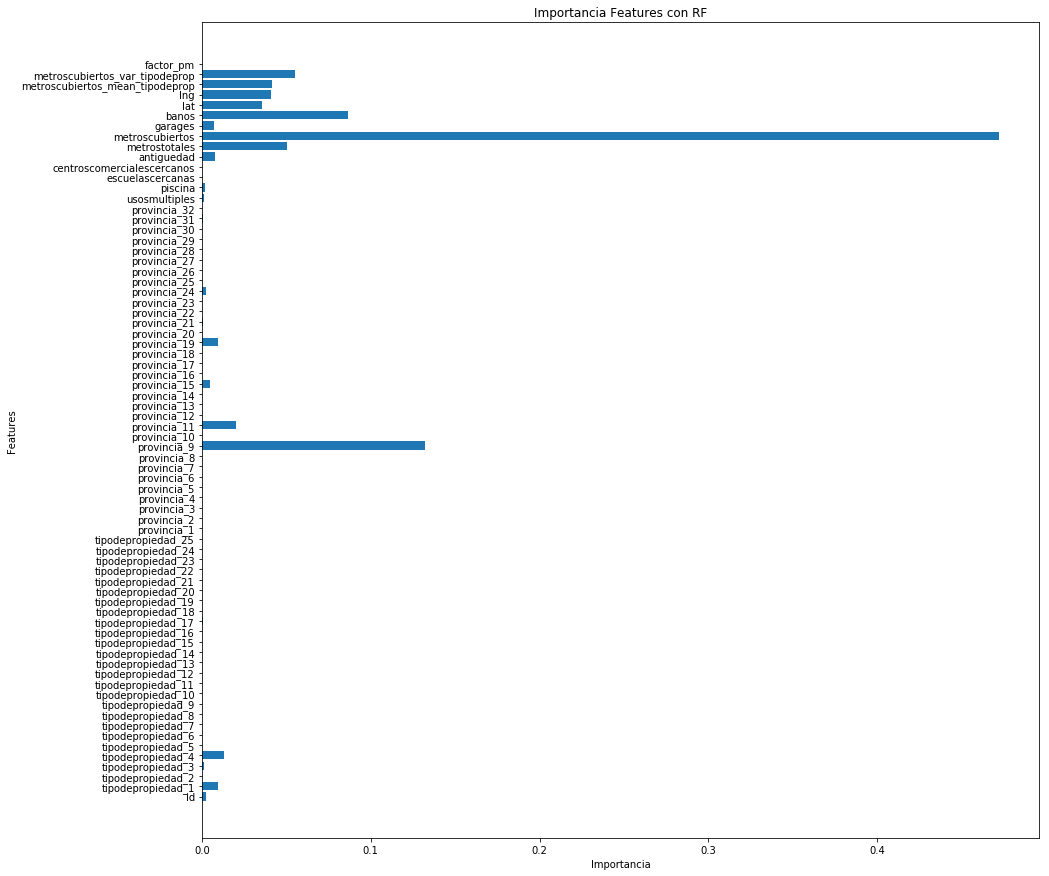

In [15]:
plt.figure(figsize = (15,15))
plt.barh(X_train.columns, model_RF.feature_importances_)
plt.xlabel('Importancia')
plt.ylabel('Features')
plt.title('Importancia Features con RF')
plt.show()

# Se genera el archivo con las predicciones a subir a Kaggle

In [16]:
test_set = pd.read_csv("test_set.csv")

In [17]:
test_set.head()

,id,tipodepropiedad_1,tipodepropiedad_2,tipodepropiedad_3,tipodepropiedad_4,tipodepropiedad_5,tipodepropiedad_6,tipodepropiedad_7,tipodepropiedad_8,tipodepropiedad_9,...,centroscomercialescercanos,antiguedad,metrostotales,metroscubiertos,garages,banos,lat,lng,metroscubiertos_mean_tipodeprop,metroscubiertos_var_tipodeprop
0,4941,0,0,0,1,0,0,0,0,0,...,0.0,29.0,112.0,300.0,1.0,4.0,19.408668,-99.246767,193.99647,9800.169327
1,51775,0,0,0,0,0,1,0,0,0,...,0.0,0.0,67.0,67.0,1.0,1.0,21.032480,-89.592424,116.17750,4423.045371
2,115253,0,0,1,0,0,0,0,0,0,...,1.0,0.0,100.0,87.0,1.0,2.0,19.332829,-99.152913,116.17750,4423.045371
3,299321,0,0,1,0,0,0,0,0,0,...,0.0,2.0,86.0,86.0,2.0,2.0,16.860487,-99.878383,116.17750,4423.045371
4,173570,0,0,0,1,0,0,0,0,0,...,1.0,10.0,76.0,80.0,1.0,1.0,19.640482,-99.127273,193.99647,9800.169327


In [18]:
pred_a_kaggle = model_RF.predict(test_set)

ValueError: Number of features of the model must match the input. Model n_features is 72 and input n_features is 71 

In [ ]:
pred_a_kaggle

In [ ]:
df_a_kaggle = pd.DataFrame()
df_a_kaggle['id'] = test_set['id']
df_a_kaggle['target'] = pred_a_kaggle
df_a_kaggle.head()

Por alguna razon estan duplicados las filas. Debe haber un error en la generacion del csv. Habra que verificar

In [ ]:
df_a_kaggle = df_a_kaggle.drop_duplicates("id")

In [ ]:
len(df_a_kaggle)

In [ ]:
df_a_kaggle.to_csv("subir_a_kaggle", header = True, index = False)